In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
ROOT_DIR = "/content/drive/MyDrive/wb_localization_dataset"

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.5/756.5 kB 17.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
import os
import numpy as np
import torch
from ultralytics import YOLO

# Load the model
model = YOLO("/content/drive/MyDrive/wb_localization_dataset/best.pt")


# #Use the model
# results = model.train(data = os.path.join (ROOT_DIR, "colab_config.yaml"), epochs = 100,
#             batch = 3,
#             pretrained = True,
#             imgsz = 1280,
#             optimizer = 'SGD',
#             lr0 = 0.01,
#             momentum = 0.937, weight_decay = 0.0005)


0: 1280x832 130 nom_chars, 115.0ms
Number of detected objects: 130


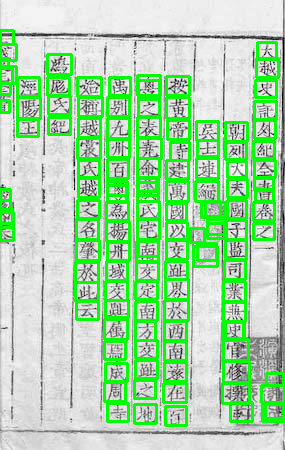

Speed: 26.1ms preprocess, 115.0ms inference, 2858.0ms postprocess per image at shape (1, 3, 1280, 832)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/wb_localization_dataset/DVSKTT_ngoai_I_1a.jpg")

# Make a prediction
results = model.predict(source=img, save=False, stream=True)

# Visualize the results
for result in results:
    boxes = result.boxes  # Bounding box predictions
    print(f"Number of detected objects: {len(boxes)}")
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

    # Display the image with bounding boxes
    cv2_imshow(img)

In [ ]:
results = model.train(data = os.path.join (ROOT_DIR, "colab_config.yaml"), epochs = 100,
            batch = 3,
            pretrained = True,
            imgsz = 1280,
            optimizer = 'SGD',
            lr0 = 0.01,
            momentum = 0.937, weight_decay = 0.0005)

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/wb_localization_dataset/best.pt, data=/content/drive/MyDrive/wb_localization_dataset/colab_config.yaml, epochs=100, time=None, patience=100, batch=3, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

100%|██████████| 755k/755k [00:00<00:00, 10.7MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.23M/6.23M [00:00<00:00, 252MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/train.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:14<00:00,  1.46s/it]

val: New cache created: /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004921875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.62G     0.9908     0.5871      1.007        229       1280: 100%|██████████| 24/24 [00:32<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         10       1956       0.98       0.96       0.99      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       6.4G     0.9833     0.5988      1.042        179       1280: 100%|██████████| 24/24 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         10       1956      0.986      0.971      0.993      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.25G      1.067     0.6147      1.023        529       1280: 100%|██████████| 24/24 [00:09<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         10       1956      0.987      0.963       0.99      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.06G      1.031     0.6052       1.03        161       1280: 100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         10       1956      0.986       0.97       0.99      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.15G      1.212     0.6506      1.044        258       1280: 100%|██████████| 24/24 [00:11<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         10       1956      0.983      0.974      0.991      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.68G       1.02     0.5798      1.019        192       1280: 100%|██████████| 24/24 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         10       1956      0.986       0.97       0.99      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.91G       1.09     0.6039      1.045        176       1280: 100%|██████████| 24/24 [00:12<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]


                   all         10       1956      0.982      0.972       0.99      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.77G      1.063     0.6091      1.031        249       1280: 100%|██████████| 24/24 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         10       1956      0.986      0.968       0.99      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.25G      1.095     0.6026       1.01        314       1280: 100%|██████████| 24/24 [00:11<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         10       1956      0.984       0.97       0.99      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.87G      1.081     0.5951      0.998        275       1280: 100%|██████████| 24/24 [00:09<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         10       1956       0.98       0.97       0.99      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.47G      1.011      0.597      1.008        197       1280: 100%|██████████| 24/24 [00:08<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         10       1956      0.985      0.965      0.991      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         7G      1.092     0.6102      1.016        152       1280: 100%|██████████| 24/24 [00:11<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         10       1956      0.988      0.974      0.993      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.09G       1.01     0.6038      1.032        129       1280: 100%|██████████| 24/24 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         10       1956      0.983      0.974       0.99      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.88G      1.039     0.6025     0.9933        425       1280: 100%|██████████| 24/24 [00:11<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         10       1956      0.985      0.976      0.993      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.54G     0.9862     0.5774     0.9971        223       1280: 100%|██████████| 24/24 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         10       1956      0.982      0.977      0.992      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.71G      1.014     0.5848      0.995        197       1280: 100%|██████████| 24/24 [00:10<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         10       1956      0.983      0.976      0.993      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.86G      1.004      0.581     0.9875        153       1280: 100%|██████████| 24/24 [00:09<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         10       1956      0.983      0.972      0.992      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.51G      1.009     0.5787      0.983        450       1280: 100%|██████████| 24/24 [00:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         10       1956      0.981      0.978      0.992       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.12G      0.995     0.5897      1.028        405       1280: 100%|██████████| 24/24 [00:11<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         10       1956      0.983       0.97      0.993      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.73G     0.9747     0.5738       1.01        171       1280: 100%|██████████| 24/24 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         10       1956      0.982      0.976       0.99      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.47G     0.9879     0.5797     0.9955        294       1280: 100%|██████████| 24/24 [00:11<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


                   all         10       1956      0.986      0.968      0.993      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       8.2G      1.004      0.577     0.9854        494       1280: 100%|██████████| 24/24 [00:08<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         10       1956      0.981      0.974      0.992      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.55G      1.008     0.5774     0.9769        180       1280: 100%|██████████| 24/24 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         10       1956      0.984      0.969      0.992      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.72G      0.987     0.5716     0.9904        193       1280: 100%|██████████| 24/24 [00:09<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         10       1956      0.981      0.977      0.991      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.03G      1.014     0.5696     0.9792        437       1280: 100%|██████████| 24/24 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         10       1956      0.985      0.979      0.992      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.84G     0.9649     0.5631     0.9866        201       1280: 100%|██████████| 24/24 [00:10<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         10       1956      0.982      0.977      0.993      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.84G     0.9708     0.5461     0.9713        344       1280: 100%|██████████| 24/24 [00:08<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         10       1956      0.985       0.98      0.992      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.18G     0.9721     0.5485     0.9619        625       1280: 100%|██████████| 24/24 [00:12<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]


                   all         10       1956       0.98      0.979      0.993      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.87G     0.9276      0.531     0.9643        248       1280: 100%|██████████| 24/24 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         10       1956      0.984      0.976      0.993      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.22G     0.9885     0.5631     0.9891        164       1280: 100%|██████████| 24/24 [00:11<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         10       1956       0.98      0.979      0.993      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       6.6G     0.9252     0.5385     0.9758        402       1280: 100%|██████████| 24/24 [00:09<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         10       1956      0.982      0.978      0.992      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.33G     0.9328       0.53     0.9703        286       1280: 100%|██████████| 24/24 [00:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         10       1956      0.982       0.98      0.991      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.55G     0.9232     0.5289     0.9675        391       1280: 100%|██████████| 24/24 [00:11<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         10       1956      0.984      0.975      0.993      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.49G     0.9273     0.5355     0.9875        461       1280: 100%|██████████| 24/24 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         10       1956      0.982      0.981      0.993        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.55G     0.9446     0.5488     0.9591        347       1280: 100%|██████████| 24/24 [00:12<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         10       1956      0.985      0.972      0.993      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       7.4G     0.9282     0.5386     0.9824        202       1280: 100%|██████████| 24/24 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         10       1956      0.985      0.981      0.992      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.28G     0.9324     0.5411     0.9654        185       1280: 100%|██████████| 24/24 [00:11<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         10       1956      0.985      0.977      0.993      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.29G     0.9402     0.5287     0.9646        373       1280: 100%|██████████| 24/24 [00:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         10       1956      0.985      0.978      0.994      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.39G     0.9387     0.5461     0.9795        183       1280: 100%|██████████| 24/24 [00:09<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         10       1956      0.986      0.979      0.994      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.13G     0.9422      0.533     0.9705        154       1280: 100%|██████████| 24/24 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         10       1956      0.985       0.98      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.88G      0.916     0.5197     0.9459        302       1280: 100%|██████████| 24/24 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]


                   all         10       1956      0.987      0.978      0.993      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.86G     0.9376     0.5311      0.978        183       1280: 100%|██████████| 24/24 [00:12<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         10       1956       0.99      0.977      0.993      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.78G     0.9074     0.5208     0.9723        403       1280: 100%|██████████| 24/24 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         10       1956      0.985      0.981      0.993      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.43G     0.8845     0.5089     0.9459        214       1280: 100%|██████████| 24/24 [00:11<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         10       1956       0.99      0.976      0.993      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.78G     0.9126     0.5166     0.9458        341       1280: 100%|██████████| 24/24 [00:09<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         10       1956      0.986       0.98      0.993      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.69G     0.8955     0.5109     0.9422        641       1280: 100%|██████████| 24/24 [00:10<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         10       1956      0.987      0.977      0.994       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       6.5G     0.9265     0.5301     0.9599        113       1280: 100%|██████████| 24/24 [00:10<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         10       1956      0.987      0.979      0.992      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.91G     0.9156     0.5136     0.9333        515       1280: 100%|██████████| 24/24 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         10       1956      0.987      0.976      0.993      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.37G     0.9029     0.5124      0.937        528       1280: 100%|██████████| 24/24 [00:12<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         10       1956      0.987      0.979      0.992      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       8.3G     0.9399     0.5339     0.9537        336       1280: 100%|██████████| 24/24 [00:08<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         10       1956      0.987      0.979      0.994      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.53G     0.8525     0.5108     0.9554         85       1280: 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         10       1956      0.989      0.979      0.993      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       7.6G     0.8779      0.514     0.9475        252       1280: 100%|██████████| 24/24 [00:10<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         10       1956       0.99      0.979      0.994      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.06G     0.8359     0.4932     0.9438        257       1280: 100%|██████████| 24/24 [00:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


                   all         10       1956      0.989      0.978      0.994      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.93G     0.8962     0.5366     0.9587        723       1280: 100%|██████████| 24/24 [00:11<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         10       1956      0.988      0.979      0.994       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.61G     0.8849     0.5085     0.9497        353       1280: 100%|██████████| 24/24 [00:08<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


                   all         10       1956      0.984      0.982      0.993      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       6.8G     0.8677     0.5057     0.9477        197       1280: 100%|██████████| 24/24 [00:12<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         10       1956      0.989      0.979      0.994      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.63G     0.8881      0.505     0.9315        613       1280: 100%|██████████| 24/24 [00:10<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         10       1956      0.989      0.981      0.993      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.66G     0.8452     0.5644     0.9646         35       1280: 100%|██████████| 24/24 [00:09<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         10       1956      0.989      0.978      0.994      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.31G     0.8154     0.4817     0.9365        143       1280: 100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         10       1956      0.988       0.98      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.27G     0.8382     0.4974     0.9611        601       1280: 100%|██████████| 24/24 [00:07<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         10       1956       0.99       0.98      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.75G     0.8562     0.4953     0.9386        473       1280: 100%|██████████| 24/24 [00:11<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         10       1956      0.991      0.981      0.994      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         8G     0.8668     0.5008     0.9421        301       1280: 100%|██████████| 24/24 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         10       1956      0.991      0.979      0.994      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.47G     0.8689     0.4929     0.9295        348       1280: 100%|██████████| 24/24 [00:12<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         10       1956      0.989       0.98      0.994      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.89G     0.8451       0.49     0.9395        179       1280: 100%|██████████| 24/24 [00:08<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         10       1956      0.991       0.98      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.3G     0.8789     0.5002     0.9423        650       1280: 100%|██████████| 24/24 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         10       1956       0.99      0.981      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.82G     0.8318     0.4788     0.9294        167       1280: 100%|██████████| 24/24 [00:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         10       1956       0.99      0.982      0.994       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.73G     0.8811      0.494     0.9245        398       1280: 100%|██████████| 24/24 [00:09<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         10       1956      0.991      0.982      0.994      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.54G     0.8554     0.4897     0.9361        504       1280: 100%|██████████| 24/24 [00:11<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         10       1956      0.991       0.98      0.994      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.53G      0.835     0.4808     0.9403        267       1280: 100%|██████████| 24/24 [00:08<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]


                   all         10       1956      0.992      0.982      0.994      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.56G     0.8348     0.4832     0.9258        184       1280: 100%|██████████| 24/24 [00:11<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         10       1956      0.992       0.98      0.994      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.66G     0.8098     0.4641      0.918        288       1280: 100%|██████████| 24/24 [00:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         10       1956      0.992       0.98      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.57G     0.8437     0.4878      0.931        454       1280: 100%|██████████| 24/24 [00:10<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         10       1956      0.992      0.981      0.994      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.74G     0.7904     0.4642     0.9292        198       1280: 100%|██████████| 24/24 [00:09<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         10       1956      0.991      0.979      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.38G     0.8374     0.4782     0.9117        258       1280: 100%|██████████| 24/24 [00:09<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         10       1956       0.99      0.982      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.28G     0.8084     0.4666     0.9226        777       1280: 100%|██████████| 24/24 [00:11<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         10       1956       0.99       0.98      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.81G     0.8527     0.4832     0.9265        203       1280: 100%|██████████| 24/24 [00:08<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         10       1956       0.99      0.982      0.994      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.17G     0.7985     0.4654     0.9268        320       1280: 100%|██████████| 24/24 [00:11<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         10       1956      0.991      0.981      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.66G     0.8265     0.4722     0.9332        477       1280: 100%|██████████| 24/24 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         10       1956      0.991      0.982      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.46G     0.8263     0.4843     0.9243        541       1280: 100%|██████████| 24/24 [00:11<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]


                   all         10       1956      0.991      0.982      0.994      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.96G     0.8307     0.4775     0.9207        376       1280: 100%|██████████| 24/24 [00:09<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         10       1956      0.992       0.98      0.994      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.13G     0.8283     0.4747     0.9345        377       1280: 100%|██████████| 24/24 [00:08<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         10       1956      0.992      0.981      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.73G     0.7664     0.4505     0.9168        595       1280: 100%|██████████| 24/24 [00:10<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         10       1956      0.991       0.98      0.994      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.86G     0.8058     0.4668     0.9228        616       1280: 100%|██████████| 24/24 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         10       1956      0.991      0.981      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.33G     0.8167     0.4612     0.8979        843       1280: 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         10       1956      0.991      0.981      0.994      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       7.5G     0.8279     0.4882     0.9354        120       1280: 100%|██████████| 24/24 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         10       1956      0.991      0.981      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.51G     0.7889     0.4632     0.9385        120       1280: 100%|██████████| 24/24 [00:10<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


                   all         10       1956      0.991      0.983      0.994      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.52G     0.8012     0.4644     0.9303        201       1280: 100%|██████████| 24/24 [00:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         10       1956      0.991      0.981      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.39G     0.7729     0.4566     0.9212        227       1280: 100%|██████████| 24/24 [00:09<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         10       1956       0.99      0.981      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.27G     0.8327     0.4841     0.9204        140       1280: 100%|██████████| 24/24 [00:12<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         10       1956      0.991       0.98      0.994       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.35G     0.8096     0.4673     0.9223        464       1280: 100%|██████████| 24/24 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         10       1956      0.992      0.981      0.994      0.827


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.39G     0.8376     0.5316     0.9469         49       1280: 100%|██████████| 24/24 [00:18<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         10       1956      0.989      0.983      0.994       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.38G     0.7679     0.4687     0.9052        242       1280: 100%|██████████| 24/24 [00:10<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         10       1956       0.99      0.983      0.994      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.18G     0.8572     0.5714     0.9511         41       1280: 100%|██████████| 24/24 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         10       1956      0.989      0.982      0.994      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.29G     0.7843     0.4767     0.9236        216       1280: 100%|██████████| 24/24 [00:10<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         10       1956      0.988      0.982      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.22G     0.8069     0.4873     0.9126        264       1280: 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         10       1956      0.989      0.981      0.994      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         4G     0.7661     0.4641     0.9123        178       1280: 100%|██████████| 24/24 [00:09<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         10       1956       0.99      0.982      0.994      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.61G     0.7835     0.4775     0.9214        226       1280: 100%|██████████| 24/24 [00:06<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         10       1956      0.989      0.982      0.994      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.68G      0.793     0.4817     0.9228        221       1280: 100%|██████████| 24/24 [00:09<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         10       1956      0.989      0.982      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.88G     0.7766     0.4727     0.9271        200       1280: 100%|██████████| 24/24 [00:06<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         10       1956       0.99      0.983      0.994      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.46G     0.7572     0.4593     0.9222        219       1280: 100%|██████████| 24/24 [00:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         10       1956      0.989      0.983      0.994      0.829



100 epochs completed in 0.336 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]


                   all         10       1956      0.991      0.982      0.994      0.831
Speed: 0.6ms preprocess, 8.5ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model2 = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
results = model2.val(data='/content/drive/MyDrive/wb_localization_dataset/colab_config.yaml')

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


                   all         10       1956      0.991      0.982      0.994      0.836
Speed: 0.8ms preprocess, 42.1ms inference, 0.0ms loss, 15.1ms postprocess per image
Results saved to runs/detect/val
